<a href="https://colab.research.google.com/github/enoveri/Deep-Learning/blob/CNNs/ComputerVision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [84]:
import torch
import torch.nn as nn

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

print(torch.__version__)
print(torchvision.__version__)

2.5.1+cu121
0.20.1+cu121


In [85]:
#Dealing with Data
# Train Data
train_data = datasets.FashionMNIST(
    root= "Train data",
    train= True,
    download= True,
    transform= torchvision.transforms.ToTensor(),
    target_transform= None
)


In [86]:
test_data = datasets.FashionMNIST(
    root = "Test data",
    download= True,
    transform = torchvision.transforms.ToTensor(),
    train= False,


)

In [87]:
len(test_data), len(train_data)

(10000, 60000)

In [88]:
image, label = train_data[0]
image,label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [89]:
class_names=train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [90]:
image.shape, label

(torch.Size([1, 28, 28]), 9)

Text(0.5, 1.0, 'Ankle boot')

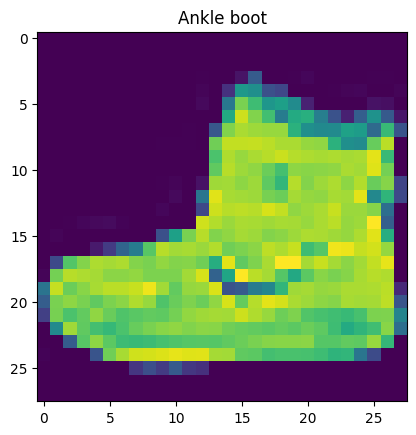

In [91]:
plt.imshow(image.squeeze())
plt.title(class_names[label])

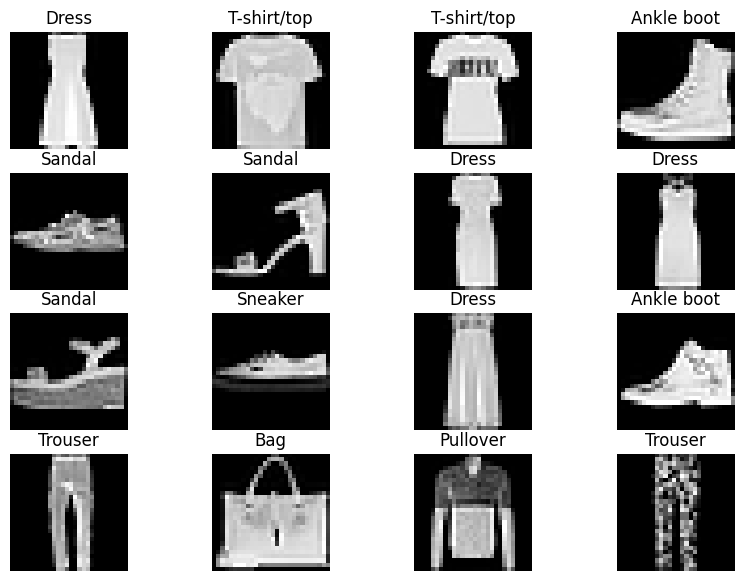

In [92]:
# Visualize a sample of images from our database
fig=plt.figure(figsize=(10,7))
rows, cols = 4,4
for i in range(rows*cols):
    random_index = torch.randint(0, len(train_data),(1,)).item()
    image, label = train_data[random_index]
    plt.subplot(rows,cols, i+1)

    plt.imshow(image.squeeze(), cmap="grey")
    plt.title(class_names[label])
    plt.axis(False)

In [93]:
Train_data_loader =  torch.utils.data.DataLoader(
    dataset = train_data,
    batch_size= 32,
    shuffle=True,

)

In [94]:
Test_data_loader = torch.utils.data.DataLoader(
    dataset = test_data,
    batch_size = 32,
    shuffle = False,

)

In [95]:
Test_data_loader, Train_data_loader

(<torch.utils.data.dataloader.DataLoader at 0x7e38978abee0>,
 <torch.utils.data.dataloader.DataLoader at 0x7e3897a21a50>)

In [96]:
train_features, train_labels=next(iter(Train_data_loader))
test_features, test_labels =next(iter(Test_data_loader))
len(train_features)

32

Text(0.5, 1.0, 'T-shirt/top')

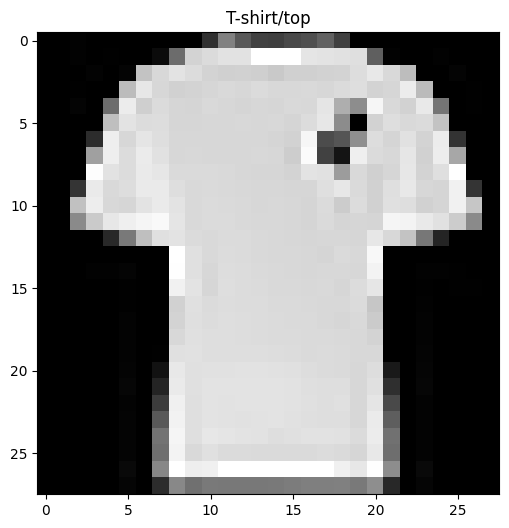

In [97]:
image_idx = torch.randint(0, len(train_features), (1,)).item()
plt.figure(figsize=(10,6))
plt.imshow(train_features[image_idx].squeeze(),cmap="grey")
plt.title(class_names[train_labels[image_idx]])

In [98]:
flatten_layer = nn.Flatten()
input = test_features[0]
input.shape, flatten_layer(input).shape

(torch.Size([1, 28, 28]), torch.Size([1, 784]))

In [99]:
#Building a baseline Model
class FashionMNISTV1(nn.Module):
    def __init__(self, input_shape, hidden_units, output_shape):
        super().__init__()
        self.layer_stack =nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.Linear(in_features=hidden_units, out_features=output_shape)
        )
    def forward(self, input):
        return self.layer_stack(input)

In [100]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [101]:
torch.manual_seed(42)
model_0 = FashionMNISTV1(784,10,len(class_names)).to(device)


In [102]:
from pathlib import Path
import requests

if Path("helper_functions.py").is_file():
    print("File Already exists, skiping download")
else:
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open("helper_functions.py", "wb") as f:
        f.write(request.content)

File Already exists, skiping download


In [103]:
from helper_functions import accuracy_fn
acc =accuracy_fn
lossFunc = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params= model_0.parameters(),lr = 0.1)

In [104]:
from timeit import default_timer as timer
def print_time(start:float, end:float, device : torch.device=None):
    total_time = end - start
    print(f"Train time on {device} : {total_time} ")

In [105]:
#Training loop
from tqdm.auto import tqdm
torch.manual_seed(42)
epochs = 3
start_time_on_cpu =timer()
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---")
    train_loss = 0
    for batch, (x, y) in enumerate(Train_data_loader):
        x,y, = x.to(device), y.to(device)
        model_0.train()
        y_pred = model_0(x)
        loss = lossFunc(y_pred,y)
        train_loss += loss
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if batch%400 ==0:
            print(f"Have seen {batch*len(x)}/{len(Train_data_loader.dataset):.4f}")
    train_loss /= len(Train_data_loader)
    test_loss, test_acc = 0,0
    model_0.eval()
    with torch.inference_mode():
        for (x,y) in Test_data_loader:
            x,y, = x.to(device), y.to(device)
            y_pred = model_0(x)
            test_loss += lossFunc(y_pred, y)
            test_acc += accuracy_fn(y ,torch.argmax(y_pred, dim=1))
        test_loss /= len(Test_data_loader)
        test_acc /= len(Test_data_loader)
    print(f"Test Loss: {test_loss:.4f} | Test Acc | {test_acc:.4f}")


end_time_on_cpu = timer()
model_0_time =end_time_on_cpu-start_time_on_cpu
print_time(start_time_on_cpu,end_time_on_cpu,str(next(iter(model_0.parameters())).device))




  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---
Have seen 0/60000.0000
Have seen 12800/60000.0000
Have seen 25600/60000.0000
Have seen 38400/60000.0000
Have seen 51200/60000.0000
Test Loss: 0.5095 | Test Acc | 82.0387
Epoch: 1
---
Have seen 0/60000.0000
Have seen 12800/60000.0000
Have seen 25600/60000.0000
Have seen 38400/60000.0000
Have seen 51200/60000.0000
Test Loss: 0.4799 | Test Acc | 83.1969
Epoch: 2
---
Have seen 0/60000.0000
Have seen 12800/60000.0000
Have seen 25600/60000.0000
Have seen 38400/60000.0000
Have seen 51200/60000.0000
Test Loss: 0.4766 | Test Acc | 83.4265
Train time on cpu : 39.9906917520002 


In [106]:
str(next(iter(model_0.parameters())).device)

'cpu'

In [107]:
#Making Predictions on our data
def model_eval(model: nn.Module,
               dataLoader:torch.utils.data.DataLoader,
               lossFunc:nn.Module,
               accuracy_fn,
               time,
               device:torch.device=device
               ):
    loss, acc = 0,0
    model.eval()
    with torch.inference_mode():
        for (x,y) in dataLoader:
            x,y = x.to(device), y.to(device)
            preds = model(x)
            loss += lossFunc(preds, y)
            acc += accuracy_fn(y, torch.argmax(preds,dim = 1))
        loss /= len(dataLoader)
        acc /= len(dataLoader)

    return {
        "Model": model.__class__.__name__,
        "Loss": f"{loss:.4f}",
        "Accuracy": acc,
        "Time taken":time
    }




In [108]:
device

'cpu'

In [109]:
model_0_results=model_eval(model_0, Test_data_loader, lossFunc, accuracy_fn,model_0_time)
model_0_results

{'Model': 'FashionMNISTV1',
 'Loss': '0.4766',
 'Accuracy': 83.42651757188499,
 'Time taken': 39.9906917520002}

In [110]:
def train_func(model:nn.Module,
               dataLoader:torch.utils.data.DataLoader,
               loss_func: nn.Module,
               optimizer: torch.optim,
               device: torch.device
               ):
    model.train()
    train_loss = 0
    images_seen = 0
    for batch, (x,y) in enumerate(dataLoader):
        x,y = x.to(device),y.to(device)
        # print(device, y.device,x.device)
        pred = model(x)
        loss = loss_func(pred, y)
        train_loss += loss
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if batch%400 ==0:
            images_seen = f"{batch*len(x)}/{len(Train_data_loader.dataset)}"
    train_loss /= len(dataLoader)
    return {
        "Loss": train_loss,
        "images_seen": images_seen
    }


In [111]:
def test_func(model: nn.Module,
              dataLoader: torch.utils.data.DataLoader,
              lossFunc:nn.Module,
              accuracy_fn,
              device:torch.device
              ):
    # print(device, y.device,x.device)
    model.eval()
    test_loss, test_acc = 0,0
    with torch.inference_mode():
        for (x,y) in dataLoader:
            x,y = x.to(device), y.to(device)
            pred = model(x)
            test_loss = lossFunc(pred,y)
            test_acc += accuracy_fn(y, torch.argmax(pred,dim=1))
        test_loss /= len(dataLoader)
        test_acc /= len(dataLoader)
    return{
        "test_loss" : test_loss,
        "test_acc" : test_acc
    }

In [112]:
class FashionMNISTV2(nn.Module):
    def __init__(self, input_shape, hidden_units, output_shape) -> None:
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features = input_shape,
                      out_features = hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units,out_features=output_shape)

        )
    def forward(self, input):
        return self.layer_stack(input)

In [113]:
device


'cpu'

In [114]:
torch.manual_seed(42)
model_1 = FashionMNISTV2(28*28,10,len(class_names)).to(device)
next(model_1.parameters()).device

device(type='cpu')

In [115]:
loss_1 = nn.CrossEntropyLoss()
optimizer_1 = torch.optim.SGD(params= model_1.parameters(),lr = 0.01)

In [116]:
from tqdm.auto import tqdm
from timeit import default_timer as timer
epochs = 3
start_time  = timer()
for epoch in tqdm(range(epochs)):
    print(f"Epoch:{epoch}   \n")
    train_results = train_func(model_1,Train_data_loader,loss_1,optimizer_1, device)
    test_results = test_func(model_1,Test_data_loader,loss_1,accuracy_fn, device)
    print(f"Train Loss : {train_results['Loss']:.4f} | Test Loss : {test_results['test_loss']:.4f} | Test Accuracy : {test_results['test_acc']:.2f}\n")
end_time = timer()
model_1_time = end_time - start_time
print(f"Experiment time: {end_time - start_time}")

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch:0   

Train Loss : 1.1548 | Test Loss : 0.0014 | Test Accuracy : 74.17

Epoch:1   

Train Loss : 0.6336 | Test Loss : 0.0012 | Test Accuracy : 78.36

Epoch:2   

Train Loss : 0.5617 | Test Loss : 0.0010 | Test Accuracy : 79.97

Experiment time: 39.517761716999985


In [117]:
model_1_results = model_eval(model_1,Test_data_loader,loss_1,accuracy_fn,model_1_time)

Making a Convolutiona Neural Network Model


In [118]:
class FashionMNISTV3(nn.Module):
    def __init__(self,input_shape, hidden_units, output_shape ) -> None:
        super().__init__()
        self.Conv2d_block_1 = nn.Sequential(
                        nn.Conv2d(in_channels=input_shape,out_channels=hidden_units,
                        kernel_size= 3,
                        stride = 1,
                        padding= 0),
                        nn.ReLU(),
                        nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units,kernel_size=3, stride=1, padding=0),
                        nn.ReLU(),
                        nn.MaxPool2d(kernel_size=2,stride=2)
        )
        self.Conv2d_block_2 = nn.Sequential(
                        nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units,
                        kernel_size=3,
                        stride = 1,
                        padding = 0),
                        nn.ReLU(),
                        nn.Conv2d(in_channels=hidden_units,out_channels=hidden_units,kernel_size=3, stride = 1,padding = 0),
                        nn.ReLU(),
                        nn.MaxPool2d(kernel_size=2, stride= 2)
        )
        self.activation_layer = nn.Sequential(
                        nn.Flatten(),
                        nn.Linear(in_features=hidden_units*16, out_features=output_shape)

        )

    def forward(self, input):
        x= self.Conv2d_block_1(input)
        # print(x.shape)
        x= self.Conv2d_block_2(x)
        # print(x.shape)
        x= self.activation_layer(x)
        return x

In [119]:
torch.manual_seed(42)
model_3 = FashionMNISTV3(1,10,len(class_names)).to(device)
model_3

FashionMNISTV3(
  (Conv2d_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (Conv2d_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (activation_layer): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=160, out_features=10, bias=True)
  )
)

In [120]:
lossFunc_3 = nn.CrossEntropyLoss()
optimizer_3 = torch.optim.SGD(params=model_3.parameters(), lr = 0.1)


In [121]:
#Training
epochs = 3
start_time_3 = timer()
for epoch in tqdm(range(epochs)):
    print(f"\nEpoch: {epoch} ")
    train_results = train_func(model_3,
                               Train_data_loader,
                               lossFunc_3,
                               optimizer_3,
                               device)
    test_results = test_func(model_3,
                             Test_data_loader,
                             lossFunc_3,
                             accuracy_fn,
                             device)
    print(f"Images Seen : {train_results['images_seen']} | Training Loss : {train_results['Loss']:.4f} Testing Loss : {test_results['test_loss']:.4f} | Testing Acc : {test_results['test_acc']:.2f}")
end_time_3  = timer()
model_3_time =end_time_3-start_time_3
print(f"Time Taken = {model_3_time}")


  0%|          | 0/3 [00:00<?, ?it/s]


Epoch: 0 
Images Seen : 51200/60000 | Training Loss : 0.6604 Testing Loss : 0.0004 | Testing Acc : 83.10

Epoch: 1 
Images Seen : 51200/60000 | Training Loss : 0.4198 Testing Loss : 0.0007 | Testing Acc : 84.82

Epoch: 2 
Images Seen : 51200/60000 | Training Loss : 0.3744 Testing Loss : 0.0006 | Testing Acc : 86.15
Time Taken = 151.09078453400002


In [122]:
#Getting Results
model_3_results = model_eval(model_3, Test_data_loader,lossFunc_3,accuracy_fn,model_3_time)
model_3_results

{'Model': 'FashionMNISTV3',
 'Loss': '0.3756',
 'Accuracy': 86.15215654952077,
 'Time taken': 151.09078453400002}

In [123]:
# Visualizations
import pandas as pd
compare_Results = pd.DataFrame([model_0_results,model_1_results,model_3_results])
compare_Results

,Model,Loss,Accuracy,Time taken
0,FashionMNISTV1,0.4766,83.426518,39.990692
1,FashionMNISTV2,0.5641,79.972045,39.517762
2,FashionMNISTV3,0.3756,86.152157,151.090785


In [124]:

# compare_Results["Äccuracy"] = pd.to_numeric(compare_Results["Accuracy"],errors='coerce')
compare_Results["Accuracy"].dtype


dtype('float64')

<Axes: ylabel='Model'>

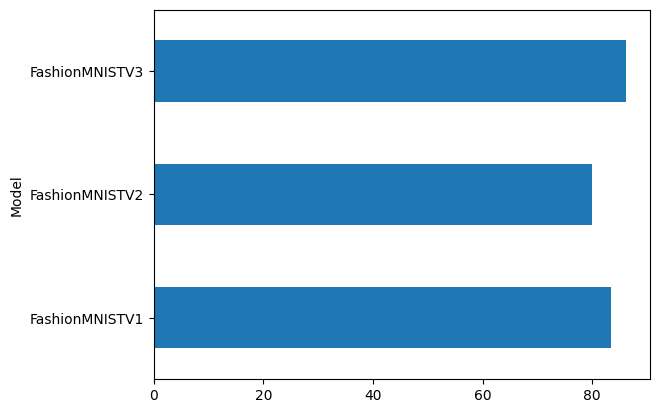

In [125]:
compare_Results.set_index("Model")["Accuracy"].plot(kind="barh")

In [185]:
def make_predictions(model:nn.Module, data:list):
    pred_list = []
    model.eval()
    with torch.inference_mode():
        for sample in data:
            sample = sample.unsqueeze(dim = 0)
            logits = model(sample)
            pred_probs = torch.argmax(logits.squeeze(), dim=0 )
            pred_list.append(pred_probs.cpu())
    return torch.stack(pred_list)

In [169]:
test_samples =[]
test_labels = []
import random
# random.seed(42)
for sample, label in random.sample(list(test_data),k=9):
    test_samples.append(sample)
    test_labels.append(label)


In [170]:
test_labels

[2, 4, 6, 3, 2, 2, 0, 1, 1]

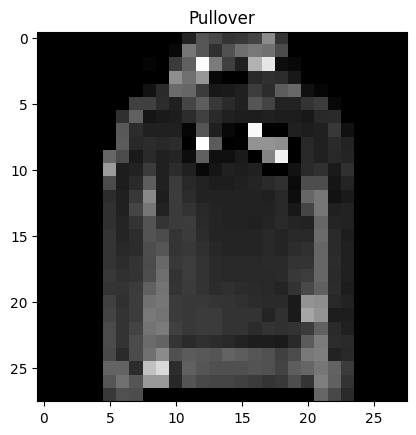

(0.0, 1.0, 0.0, 1.0)

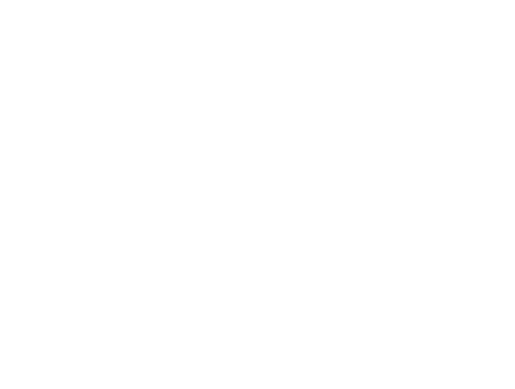

In [171]:

plt.imshow(test_samples[0].squeeze(), cmap='gray')
plt.title(class_names[test_labels[0]])
plt.show()
plt.axis(False)


In [186]:
test_predictions=  make_predictions(model_3,test_samples)
test_predictions

tensor([2, 4, 4, 3, 2, 2, 0, 1, 1])

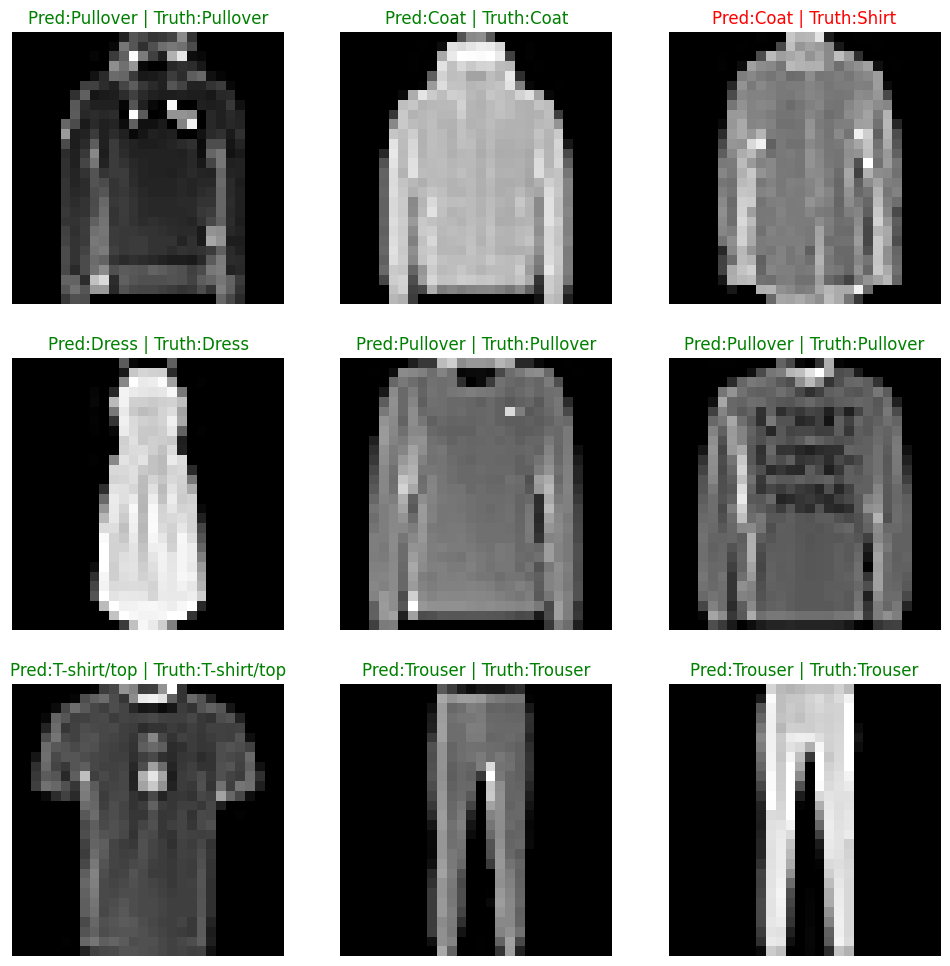

In [173]:
plt .figure(figsize=(12, 12))
rows = 3
cols= 3
for i in range(rows*cols):

    plt.subplot(rows,cols,i+1)
    plt.imshow(test_samples[i].squeeze(), cmap="gray")
    pred_label = class_names[test_predictions[i]]
    truth_label = class_names[test_labels[i]]
    title_text = f"Pred:{pred_label} | Truth:{truth_label}"
    if pred_label == truth_label:
        plt.title(title_text,c = 'g')
    else:
         plt.title(title_text,c = 'r')
    plt.axis(False)




In [177]:
import mlxtend

print(mlxtend.__version__)

0.23.3


In [178]:
!pip install torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 926.4/926.4 kB 28.5 MB/s eta 0:00:00


In [179]:
import torchmetrics


In [180]:
torchmetrics.__version__

'1.6.0'

In [219]:
#Making More predictions
pred_list = []
model_3.eval()
with torch.inference_mode():
    for (image, lable) in tqdm(Test_data_loader):
        logits = model_3(image)
        pred_label = torch.argmax(logits, dim=1)
        pred_list.append(pred_label.cpu())




  0%|          | 0/313 [00:00<?, ?it/s]

In [214]:
pred_labels = torch.cat(pred_list)
pred_labels

tensor([9, 2, 1,  ..., 8, 1, 5])

In [220]:
test_data.targets

tensor([9, 2, 1,  ..., 8, 1, 5])

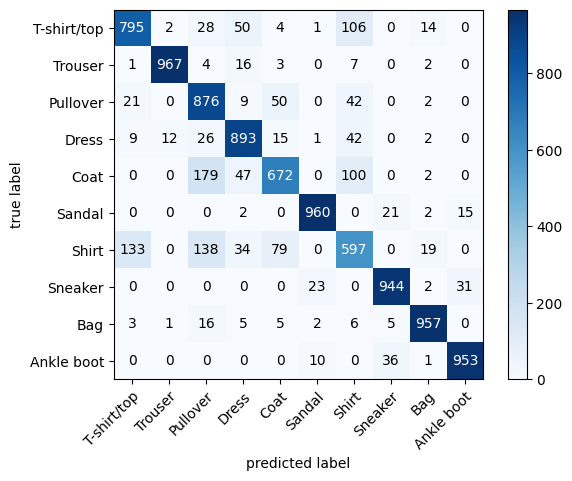

In [223]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

confmat = ConfusionMatrix(task='multiclass', num_classes=len(class_names))
confmat = confmat(pred_labels,test_data.targets)

#plotting our confusion Matrix
fig, ax = plot_confusion_matrix(conf_mat=confmat.numpy(),cmap='Blues',colorbar=True,class_names=class_names)

In [226]:
# Saving our Best model
from pathlib import Path
# create model folder
MODEL_PATH = Path('model')
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# create mode path
MODEL_NAME = "ComputerVision_Model_3.pth"
MODEL_SAVE_PATH = MODEL_PATH/MODEL_NAME
MODEL_SAVE_PATH

torch.save(obj=model_3.state_dict(), f= MODEL_SAVE_PATH)

In [229]:
#Loading the Model
loaded_model = FashionMNISTV3(1,10,len(class_names))
loaded_model.load_state_dict(state_dict=torch.load(MODEL_SAVE_PATH))

<ipython-input-229-c97334fccba0>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model.load_state_dict(state_dict=torch.load(MODEL_SAVE_PATH))


<All keys matched successfully>

In [231]:
loaded_model.to(device)

FashionMNISTV3(
  (Conv2d_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (Conv2d_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (activation_layer): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=160, out_features=10, bias=True)
  )
)

In [232]:
model_3_results

{'Model': 'FashionMNISTV3',
 'Loss': '0.3756',
 'Accuracy': 86.15215654952077,
 'Time taken': 151.09078453400002}

In [233]:
model_eval(loaded_model,Test_data_loader,lossFunc_3,accuracy_fn,model_3_time)

{'Model': 'FashionMNISTV3',
 'Loss': '0.3756',
 'Accuracy': 86.15215654952077,
 'Time taken': 151.09078453400002}